
In India urban seggregation is more likely to be led according to poverty levels instead of ethenticity, hence we are planning to modify the Schelling model and happiness scores of agents in a manner that'll fit better in this scenario
# Map
- Neighbours are in K Nearest Form 
    - https://www.geeksforgeeks.org/k-nearest-neighbours/
    - https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4
- Distances are euclidean

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
# import pandas as pd

In [ ]:
def sigmoid(x):
    if x < 0:
        temp = np.exp(x)
        temp = temp/(1+temp)
    else:
        temp = np.exp(-x)
        temp = 1/(1+temp)
    return(temp)

In [ ]:
class Location:
  def __init__(self,x,y):
    self.x = x
    self.y = y
    
  def getDistance(self,location2):
    x1,y1 = self.x,self.y
    x2,y2 = location2.x,location2.y
    dist = (x1-x2)**2 + (y1-y2)**2
    return dist ** 0.5


## Facilities

- Facilities can be thought as schools, colleges, hospitals, worship places etc.
- Facilities bring some happiness values with them.
- Facilities also bring some cost associated to them.
- A facility will provide happiness and cost throughout the map but those values will decay with distance,

  $ h'\ =\ h\cdot e^{-d}$

  $ c'\ =\ c\cdot e^{-d}$

In [ ]:
class Facility():
  def __init__(self, happiness, cost, f_location, name):
    assert(cost in range(0,11)), "Cost should be between 0 to 10"
    assert(happiness in range(0,11)), "Happiness should be between 0 to 10"
    self.happiness = happiness
    self.cost = cost
    self.name = name
    self.f_location = f_location
  
  def get_happiness_contribution(self,location):
    return(self.happiness*np.exp(-1*location.getDistance(self.f_location)))
  
  def get_cost_contribution(self,location):
    return(self.cost*np.exp(-1*location.getDistance(self.f_location)))
  

In [ ]:
def happiness_a(facilities, a_count, b_count, location, m ,n, k):

    col = 0.1 # cost of living
    neighbour_happiness = 0 # happiness due to interaction with other agents in neighbourhood
    fac_happiness = 0 # happiness due to presence of facilities

    for fac in facilities:
        if (fac.f_location.x in range(location.x -k,location.x + k)) & (fac.f_location.y in range(location.y -k,location.y + k)):
            col += fac.get_cost_contribution(location)
            fac_happiness += fac.get_happiness_contribution(location)

    x = a_count
    x *= 4/m
    neighbour_happiness += sigmoid(x) - 0.5
    
    x = b_count
    x *= 4/n
    neighbour_happiness += sigmoid(x) - 0.5
    # print(neighbour_happiness, fac_happiness, col)
    overall_happiness = 1/math.log(col) + fac_happiness + neighbour_happiness
    # print(overall_happiness)
    return( (sigmoid(overall_happiness) - 0.5)*2)

In [ ]:
def happiness_b(facilities, a_count, location, p, k):
    col = 0.1 # cost of living
    neighbour_happiness = 0 # happiness due to interaction with other agents in neighbourhood
    fac_happiness = 0 # happiness due to presence of facilities

    for fac in facilities:
        if (fac.f_location.x in range(location.x -k,location.x + k)) & (fac.f_location.y in range(location.y -k,location.y + k)):
            col += fac.get_cost_contribution(location)
            fac_happiness += fac.get_happiness_contribution(location)

    x = a_count
    x *= 2/p
    neighbour_happiness += (sigmoid(x) - 0.5)*2
    # print(neighbour_happiness, fac_happiness, col)
    overall_happiness = 1/(col**3) + fac_happiness + neighbour_happiness
    # print(overall_happiness)
    return( (sigmoid(overall_happiness) - 0.5)*2)

In [ ]:
def draw_location(location):
    distance = list(range(-20,21))
    weights = [(1/((abs(i)-10)**2 + 1)) for i in distance]
    x_move = random.choices(distance, weights)
    y_move = random.choices(distance, weights)
    return(Location(max(0,min(19,location.x + x_move[0])), max(0,min(19,location.y + y_move[0]))))

In [ ]:
def count(p,agent):
  n = 0
  neighbour_rad = list(range(k))
  for i in neighbour_rad:
    for j in neighbour_rad:
      if (p[0] + i, p[1] + j) in agent:
        n = n + 1
  return n 

## Plot distribution function

In [ ]:
def plot_distribution(agents_a, agents_b, facilities, cycle_num):
    
    plot_args = {'markersize': 8, 'alpha': 0.6}
    plt.title(f'Cycle number {cycle_num}')

    ax = []
    ay = []
    for a in agents_a:
        ax.append(a[0])
        ay.append(a[1])

    plt.plot(ax, ay, 'o', markerfacecolor='red', **plot_args, label = 'Rich') # Agent A - rich people

    bx = []
    by = []
    for b in agents_b:
        bx.append(b[0])
        by.append(b[1])

    plt.plot(bx, by, 'o', markerfacecolor='green', **plot_args, label = 'Poor') # Agent B - poor people

    fx_s = []
    fy_s = []
    fx_h = []
    fy_h = []
    fx_w = []
    fy_w = []
    for f in facilities:
        if f.name == 'School':
            fx_s.append(f.f_location.x)
            fy_s.append(f.f_location.y)
        if f.name == 'Hospital':
            fx_h.append(f.f_location.x)
            fy_h.append(f.f_location.y)
        if f.name == 'Places of Worship':
            fx_w.append(f.f_location.x)
            fy_w.append(f.f_location.y)

    plt.plot(fx_s, fy_s, 'o', markerfacecolor='yellow', **plot_args, label = 'School') # school 
    plt.plot(fx_h, fy_h, 'o', markerfacecolor='white', **plot_args, label = 'Hospital') # hospital 
    plt.plot(fx_w, fy_w, 'o', markerfacecolor='brown', **plot_args, label = 'Places of Worship') # places of worship
    
    plt.legend(bbox_to_anchor = (1.5, 0.6), loc='center right')
    plt.xlim(-1,20)
    plt.ylim(-1,20)
    plt.show()

## Initialize variables and agents

In [ ]:
k = 5
m = 15
n = 10
p = 10
happiness = [5, 10, 2.5] # should be between 0-10
cost = [6, 8, 2] #should be between 0-10
names = ['School', 'Hospital', 'Places of Worship']
side = 20

In [ ]:
indices = list(range(400))
np.random.seed(0)
np.random.shuffle(indices)

# Initializing Agents A - n_a in number
a_loc_list = []
n_a = 125
for i in range(n_a):
    loc = Location(indices[i]%side, indices[i]//side)
    a_loc_list.append((loc.x, loc.y))

# Initializing Agents B - n_b in number
b_loc_list = []
n_b = 175
for i in range(n_a, n_a + n_b):
    loc = Location(indices[i]%side, indices[i]//side)
    b_loc_list.append((loc.x, loc.y))

# Initializing schools - n_s in number
facilities = []
f_loc_list = []
n_s = 3
for i in range(n_a + n_b, n_a + n_b + n_s):
    loc = Location(indices[i]%side, indices[i]//side)
    f_loc_list.append((loc.x,loc.y))
    facilities.append(Facility(happiness[0],cost[0],loc,names[0]))

# Initializing hospitals - n_h in number
n_h = 5
for i in range(n_a + n_b + n_s, n_a + n_b + n_s + n_h):
    loc = Location(indices[i]%side, indices[i]//side)
    f_loc_list.append((loc.x,loc.y))
    facilities.append(Facility(happiness[0],cost[0],loc,names[1]))

# Initializing places of worship - n_w in number
n_w = 7
for i in range(n_a + n_b + n_s + n_h, n_a + n_b + n_s + n_h + n_w):
    loc = Location(indices[i]%side, indices[i]//side)
    f_loc_list.append((loc.x,loc.y))
    facilities.append(Facility(happiness[0],cost[0],loc,names[2]))  

## Loop through unless equilibrium in reached


Everyone moves if new location has a higher happiness score, irrespective of type of score.

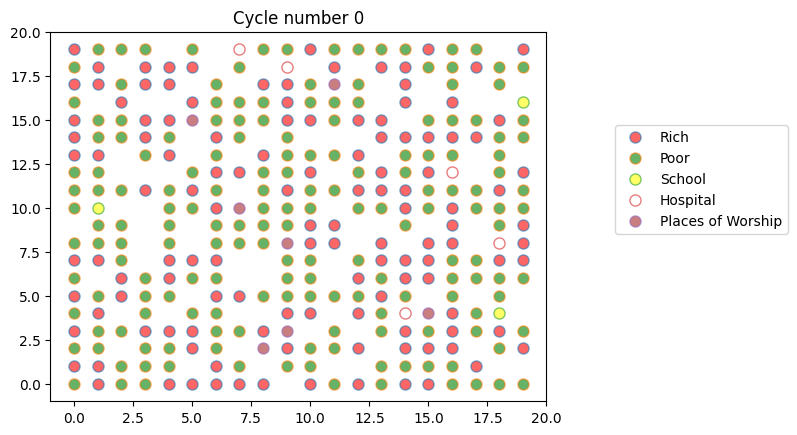

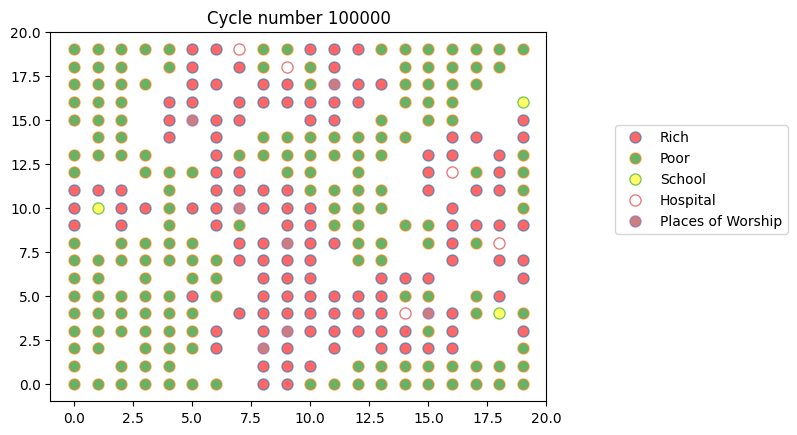

In [ ]:
max_iter = 100000

iter = 0 
icount = 0
a_move_count = 0
del_a_h = 0
b_move_count = 0
del_b_h = 0
plot_distribution(a_loc_list, b_loc_list, facilities, iter)
while iter < max_iter:
    xr = np.random.randint(side)
    yr = np.random.randint(side)

    if (xr,yr) in a_loc_list:
        ac = count((xr,yr), a_loc_list) - 1
        bc = count((xr,yr), b_loc_list)
        h_score = happiness_a(facilities, ac, bc, Location(xr,yr), m, n, k)
        if h_score < 0.95:
            lnew = draw_location(Location(xr,yr))
            if ((lnew.x,lnew.y) not in list(set(a_loc_list) | set(f_loc_list) | set(b_loc_list))) & (happiness_a(facilities, ac, bc, lnew, m, n, k) > h_score):
                a_loc_list.remove((xr,yr))
                a_loc_list.append((lnew.x,lnew.y))
                a_move_count += 1
                del_a_h += happiness_a(facilities, ac, bc, lnew, m, n, k) - h_score

    elif (xr,yr) in b_loc_list:
        ac = count((xr,yr), a_loc_list)
        h_score = happiness_b(facilities, ac, Location(xr,yr), p, k)
        if h_score < 0.95:
            lnew = draw_location(Location(xr,yr))
            if ((lnew.x,lnew.y) not in list(set(a_loc_list) | set(f_loc_list) | set(b_loc_list))) & (happiness_b(facilities, ac, lnew, p, k) > h_score):
                b_loc_list.remove((xr,yr))
                b_loc_list.append((lnew.x,lnew.y))
                b_move_count += 1
                del_b_h += happiness_b(facilities, ac, lnew, p, k) - h_score

    iter += 1
plot_distribution(a_loc_list, b_loc_list, facilities, iter)

In [ ]:
print(a_move_count, b_move_count, del_a_h/a_move_count, del_b_h/b_move_count)

151 191 0.6845082763423674 0.0857363941162655


In [ ]:
indices = list(range(400))
np.random.seed(0)
np.random.shuffle(indices)

# Initializing Agents A - n_a in number
a_loc_list = []
n_a = 125
for i in range(n_a):
    loc = Location(indices[i]%side, indices[i]//side)
    a_loc_list.append((loc.x, loc.y))

# Initializing Agents B - n_b in number
b_loc_list = []
n_b = 175
for i in range(n_a, n_a + n_b):
    loc = Location(indices[i]%side, indices[i]//side)
    b_loc_list.append((loc.x, loc.y))

# Initializing schools - n_s in number
facilities = []
f_loc_list = []
n_s = 3
for i in range(n_a + n_b, n_a + n_b + n_s):
    loc = Location(indices[i]%side, indices[i]//side)
    f_loc_list.append((loc.x,loc.y))
    facilities.append(Facility(happiness[0],cost[0],loc,names[0]))

# Initializing hospitals - n_h in number
n_h = 5
for i in range(n_a + n_b + n_s, n_a + n_b + n_s + n_h):
    loc = Location(indices[i]%side, indices[i]//side)
    f_loc_list.append((loc.x,loc.y))
    facilities.append(Facility(happiness[0],cost[0],loc,names[1]))

# Initializing places of worship - n_w in number
n_w = 7
for i in range(n_a + n_b + n_s + n_h, n_a + n_b + n_s + n_h + n_w):
    loc = Location(indices[i]%side, indices[i]//side)
    f_loc_list.append((loc.x,loc.y))
    facilities.append(Facility(happiness[0],cost[0],loc,names[2]))  

Poor people (Agent B) don't move unless the happiness score at the new place is higher by at least 5 %, as there is an associated cost with moving, which they cannot afford, unless the benefits are significantly higher

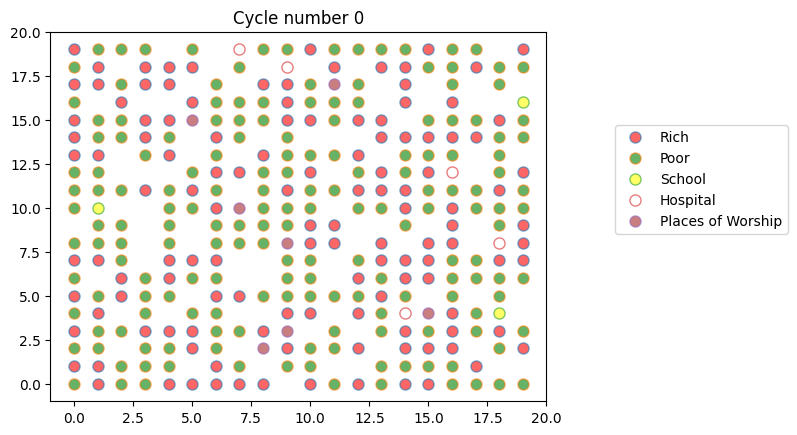

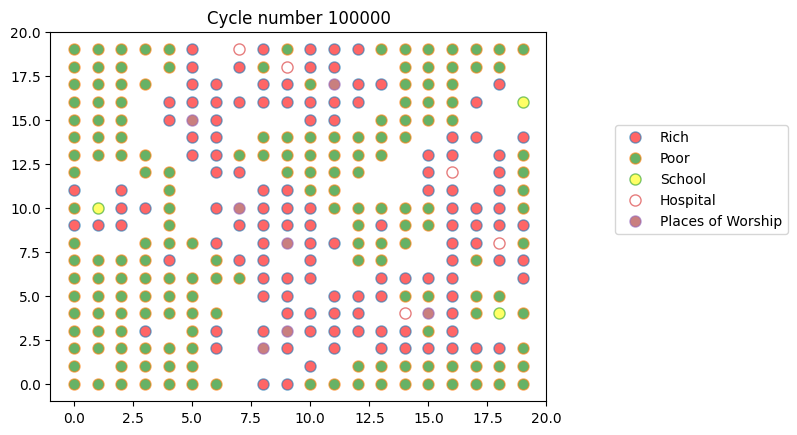

In [ ]:
max_iter = 100000

iter = 0 
icount = 0
a_move_count = 0
del_a_h = 0
b_move_count = 0
del_b_h = 0
plot_distribution(a_loc_list, b_loc_list, facilities, iter)
while iter < max_iter:
    xr = np.random.randint(side)
    yr = np.random.randint(side)

    if (xr,yr) in a_loc_list:
        ac = count((xr,yr), a_loc_list) - 1
        bc = count((xr,yr), b_loc_list)
        h_score = happiness_a(facilities, ac, bc, Location(xr,yr), m, n, k)
        if h_score < 0.95:
            lnew = draw_location(Location(xr,yr))
            if ((lnew.x,lnew.y) not in list(set(a_loc_list) | set(f_loc_list) | set(b_loc_list))) & (happiness_a(facilities, ac, bc, lnew, m, n, k) > h_score):
                a_loc_list.remove((xr,yr))
                a_loc_list.append((lnew.x,lnew.y))
                a_move_count += 1
                del_a_h += happiness_a(facilities, ac, bc, lnew, m, n, k) - h_score

    elif (xr,yr) in b_loc_list:
        ac = count((xr,yr), a_loc_list)
        h_score = happiness_b(facilities, ac, Location(xr,yr), p, k)
        if h_score < 0.95:
            lnew = draw_location(Location(xr,yr))
            if ((lnew.x,lnew.y) not in list(set(a_loc_list) | set(f_loc_list) | set(b_loc_list))) & (happiness_b(facilities, ac, lnew, p, k) > 1.05*h_score):
                b_loc_list.remove((xr,yr))
                b_loc_list.append((lnew.x,lnew.y))
                b_move_count += 1
                del_b_h += happiness_b(facilities, ac, lnew, p, k) - h_score

    iter += 1
plot_distribution(a_loc_list, b_loc_list, facilities, iter)

In [ ]:
print(a_move_count, b_move_count, del_a_h/a_move_count, del_b_h/b_move_count)

145 131 0.695553638506963 0.11940753540662721


Now we change the draw_location function where it is no longer simply based on distance, but also based on the happiness of the location. The probability function will now also take into account the happiness of the location into account.

In [ ]:
indices = list(range(400))
np.random.seed(0)
np.random.shuffle(indices)

# Initializing Agents A - n_a in number
a_loc_list = []
n_a = 125
for i in range(n_a):
    loc = Location(indices[i]%side, indices[i]//side)
    a_loc_list.append((loc.x, loc.y))

# Initializing Agents B - n_b in number
b_loc_list = []
n_b = 175
for i in range(n_a, n_a + n_b):
    loc = Location(indices[i]%side, indices[i]//side)
    b_loc_list.append((loc.x, loc.y))

# Initializing schools - n_s in number
facilities = []
f_loc_list = []
n_s = 3
for i in range(n_a + n_b, n_a + n_b + n_s):
    loc = Location(indices[i]%side, indices[i]//side)
    f_loc_list.append((loc.x,loc.y))
    facilities.append(Facility(happiness[0],cost[0],loc,names[0]))

# Initializing hospitals - n_h in number
n_h = 5
for i in range(n_a + n_b + n_s, n_a + n_b + n_s + n_h):
    loc = Location(indices[i]%side, indices[i]//side)
    f_loc_list.append((loc.x,loc.y))
    facilities.append(Facility(happiness[0],cost[0],loc,names[1]))

# Initializing places of worship - n_w in number
n_w = 7
for i in range(n_a + n_b + n_s + n_h, n_a + n_b + n_s + n_h + n_w):
    loc = Location(indices[i]%side, indices[i]//side)
    f_loc_list.append((loc.x,loc.y))
    facilities.append(Facility(happiness[0],cost[0],loc,names[2]))  

In [ ]:
def draw_location(location, type_of_agent, a_list, b_list, facilities):
    # distance = list(range(-6,7))
    assert type_of_agent in ['A','a','B','B'], 'Invalid type of agent'
    weights = []
    locations = []
    for x in range(max(location.x-6,0),min(19,location.x+7)):
        for y in range(max(location.y-6,0),min(19,location.y+7)):
            locations.append(Location(x,y))
            if type_of_agent in ['A','a']:
                ac = count((x,y), a_list) - 1
                bc = count((x,y), b_list)
                wnum = happiness_a(facilities, ac, bc, Location(x,y), m, n, k)
                wden =location.getDistance((Location(abs(x),abs(y)))) + 1
                weights.append(wnum/wden)
            else:
                ac = count((x,y), a_list) 
                wnum = happiness_b(facilities, ac, Location(x,y), p, k)
                wden = location.getDistance((Location(abs(x),abs(y)))) + 1
                weights.append(wnum/wden)           
    # print(len(weights))
    # x_move = random.choices(distance, weights)
    # y_move = random.choices(distance, weights)
    # print(locations[0])
    # return(locations[np.argmax(np.array(weights))])
    return(random.choices(locations, weights))

0 Iterations completed


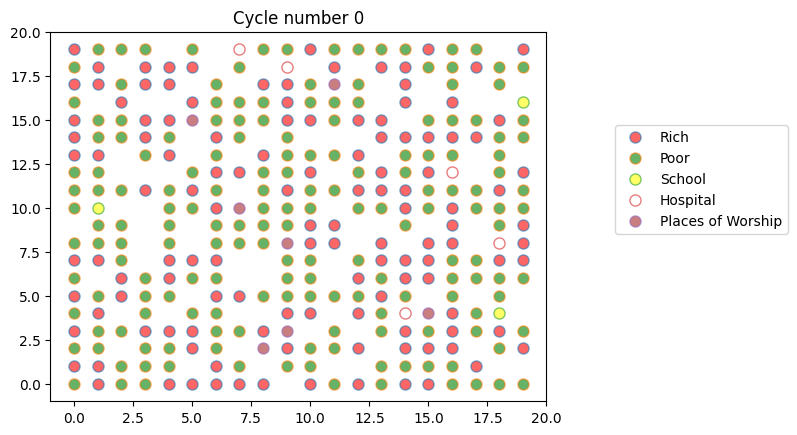

10000 Iterations completed


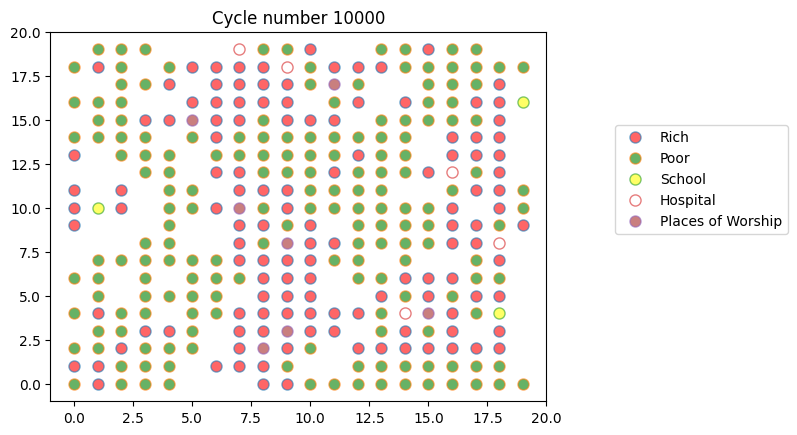

20000 Iterations completed


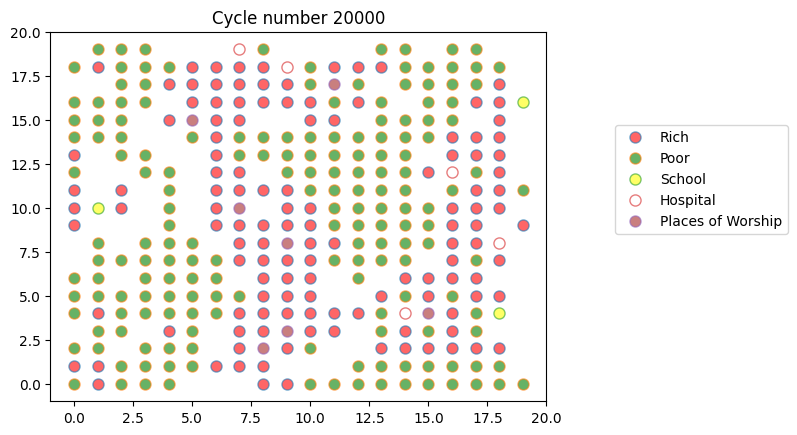

30000 Iterations completed


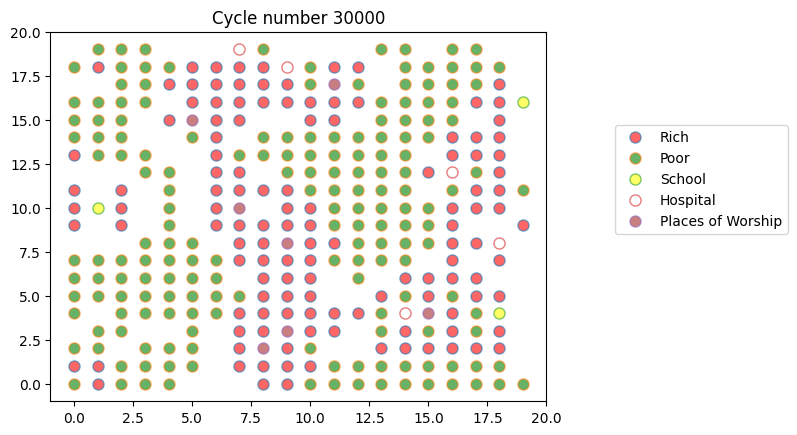

40000 Iterations completed


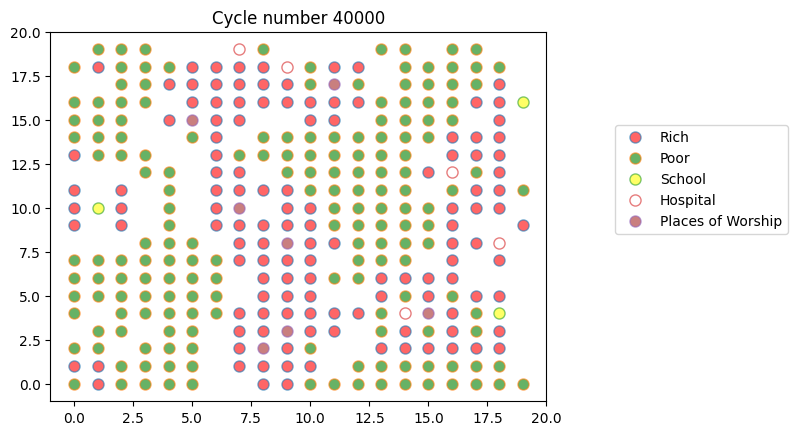

50000 Iterations completed


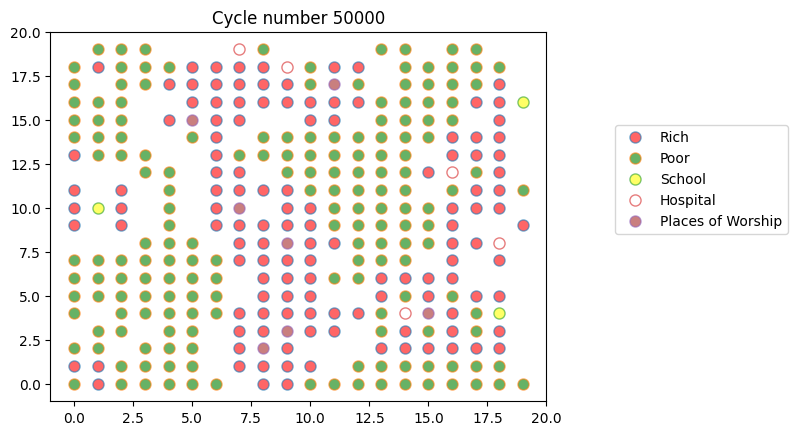

60000 Iterations completed


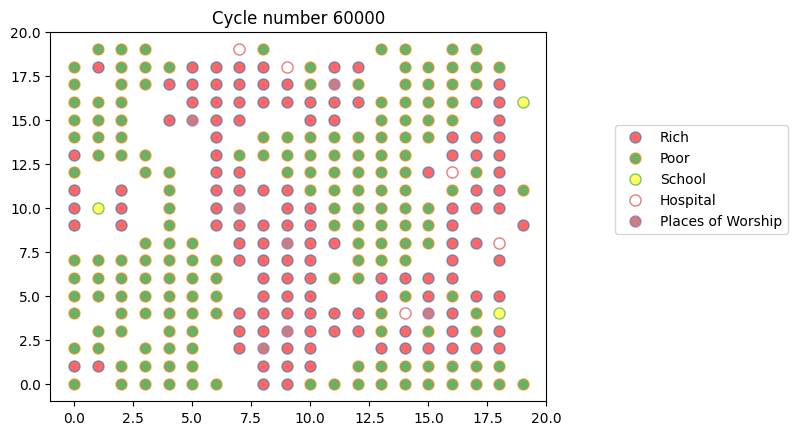

70000 Iterations completed


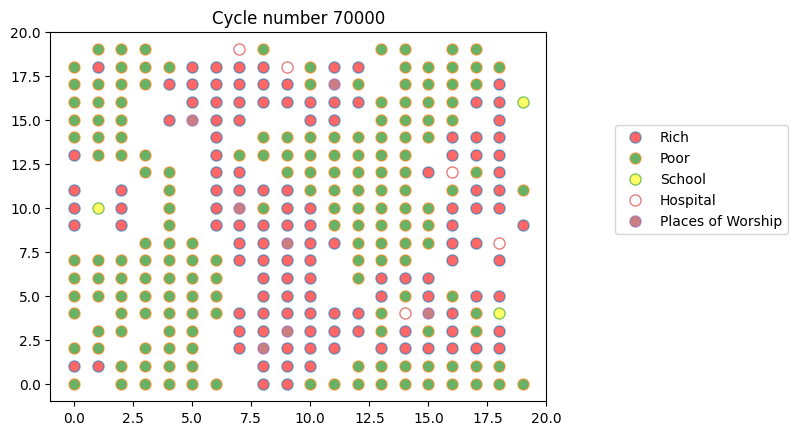

80000 Iterations completed


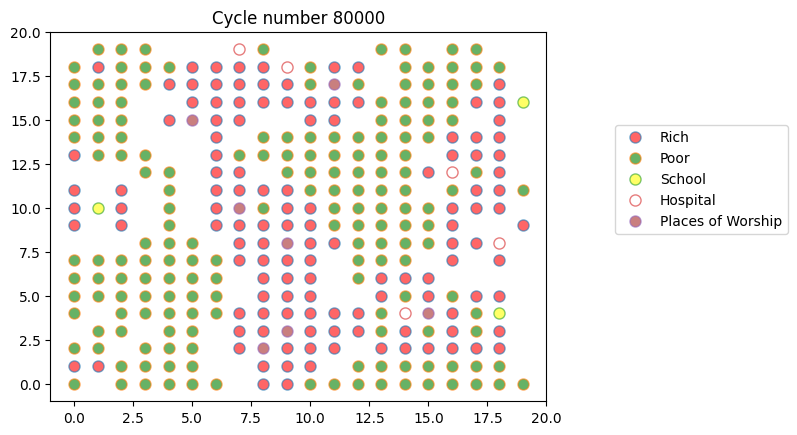

90000 Iterations completed


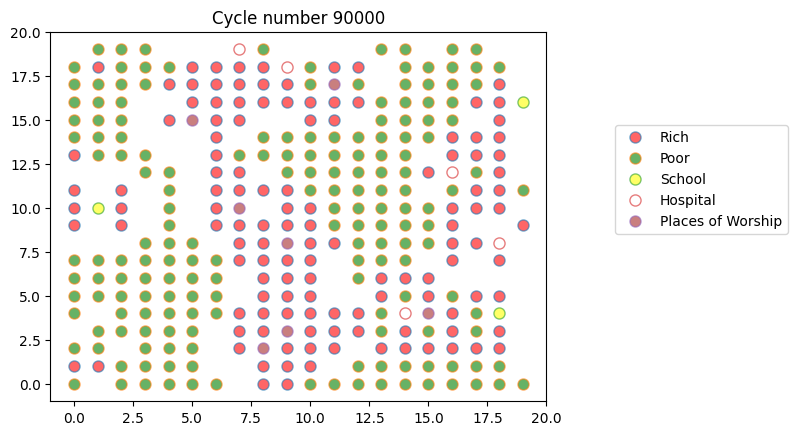

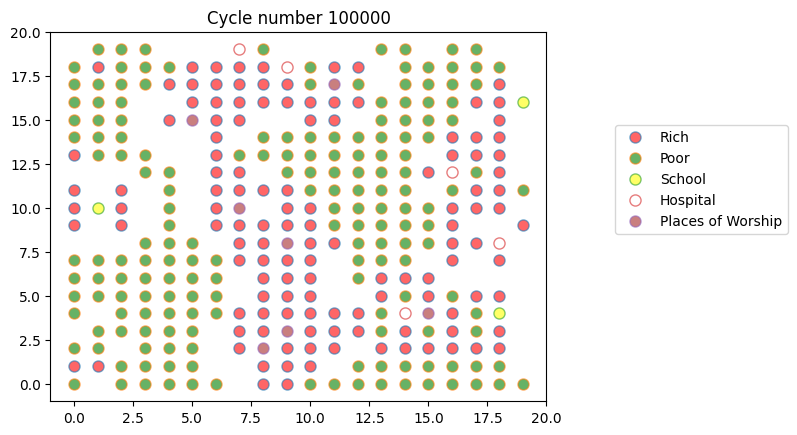

In [ ]:
max_iter = 100000

iter = 0 
icount = 0
a_move_count = 0
del_a_h = 0
b_move_count = 0
del_b_h = 0
# plot_distribution(a_loc_list, b_loc_list, facilities, iter)
while iter < max_iter:
    xr = np.random.randint(side)
    yr = np.random.randint(side)

    if iter%10000 == 0:
        print(str(iter) + ' Iterations completed')
        plot_distribution(a_loc_list, b_loc_list, facilities, iter)

    if (xr,yr) in a_loc_list:
        ac = count((xr,yr), a_loc_list) - 1
        bc = count((xr,yr), b_loc_list)
        h_score = happiness_a(facilities, ac, bc, Location(xr,yr), m, n, k)
        if h_score < 0.95:
            lnew = draw_location(Location(xr,yr), 'A', a_loc_list, b_loc_list, facilities)[0]
            if ((lnew.x,lnew.y) not in list(set(a_loc_list) | set(f_loc_list) | set(b_loc_list))) & (happiness_a(facilities, ac, bc, lnew, m, n, k) > h_score):
                a_loc_list.remove((xr,yr))
                a_loc_list.append((lnew.x,lnew.y))
                a_move_count += 1
                del_a_h += happiness_a(facilities, ac, bc, lnew, m, n, k) - h_score

    elif (xr,yr) in b_loc_list:
        ac = count((xr,yr), a_loc_list)
        h_score = happiness_b(facilities, ac, Location(xr,yr), p, k)
        if h_score < 0.95:
            lnew = draw_location(Location(xr,yr), 'B', a_loc_list, [], facilities)[0]
            if ((lnew.x,lnew.y) not in list(set(a_loc_list) | set(f_loc_list) | set(b_loc_list))) & (happiness_b(facilities, ac, lnew, p, k) > 1.05*h_score):
                b_loc_list.remove((xr,yr))
                b_loc_list.append((lnew.x,lnew.y))
                b_move_count += 1
                del_b_h += happiness_b(facilities, ac, lnew, p, k) - h_score

    iter += 1
plot_distribution(a_loc_list, b_loc_list, facilities, iter)

In [ ]:
print(a_move_count, b_move_count, del_a_h/a_move_count, del_b_h/b_move_count)

107 125 0.9182093009538497 0.12478139341877414
